# *8-shape Trajectory Generator*


In [ ]:
import math
import numpy as np

def get8ShapeTrajectory(radius, # [m]
                        using_flying_robot = False,
                        start_height = 3.0, # [m]
                        use_fixed_height = True,
                        height_variation = 0.5, # [m]
                        debug = False):

  x = np.array([])
  y = np.array([])
  heading = np.array([])

  # The number of poses in the trajectory is proportional to the eight perimeter
  eight_shape_perimeter = 2 * (2 * math.pi * radius)
  num_poses = round(eight_shape_perimeter * 0.45) # Increasing this value will increase the number of poses in the trajectory

  # Calculate vertical positions
  for i in np.linspace(0, 2 * math.pi, num_poses):
    x = np.append(x, radius * math.sin(i))
    y = np.append(y, radius * math.sin(i) * math.cos(i))

  # Calculate headings
  for i in range(num_poses - 1):
    heading = np.append(heading, math.atan2(y[i + 1] - y[i], x[i + 1] - x[i]))

  heading = np.append(heading, math.atan2(y[0] - y[-1], x[0] - x[-1]))

  # Display useful information about the trajectory
  if debug:
    dist_between_points = np.array([])
    for i in range(num_poses - 1):
      dist_between_points = np.append(dist_between_points, math.pow(x[i] - x[i + 1], 2) + math.pow(y[i] - y[i + 1], 2))

    print("Number of poses in the trajectory: %d"%(num_poses))
    print("Average distance between the points: %.2f"%(np.average(dist_between_points)))
    print("Standard deviation of the distances: %.2f"%(np.std(dist_between_points)))

  if not using_flying_robot:
    # Create filename
    filename = "eight_shape_trajectory_r" + str(radius) + ".txt"

    # Save trajectory in a file
    with open(filename, "w") as f:
      for i in range(num_poses - 1):
        f.write("%.3f %.3f %.3f\n"%(x[i], y[i], heading[i]))

      # Write last line without '\n'
      f.write("%.3f %.3f %.3f"%(x[-1], y[-1], heading[-1]))

    return x, y, heading
  else:
    z = np.array([])

    # If you are working with flying robot, you can make the robot moves up and down during the trajectory, setting the flag 'fixed_height' to False
    if not use_fixed_height:
      z = np.array([start_height + (height_variation * math.sin(i)) for i in np.linspace(0, 2 * math.pi, num_poses)])
    else:
      z = np.full(num_poses, start_height)

    # Create filename
    filename = "eight_shape_trajectory_r" + str(radius) + "f.txt"

    # Save trajectory in a file
    with open(filename, "w") as f:
      for i in range(num_poses - 1):
        f.write("%.3f %.3f %.3f %.3f\n"%(x[i], y[i], z[i], heading[i]))
      
      # Write last line without '\n'
      f.write("%.3f %.3f %.3f %.3f"%(x[-1], y[-1], z[-1], heading[-1]))
    
    return x, y, z, heading

## Usage examples

### Example 1: Get an 8-shape trajectory with twenty radii

Number of poses in the trajectory: 113
Average distance between the points: 1.26
Standard deviation of the distances: 0.63


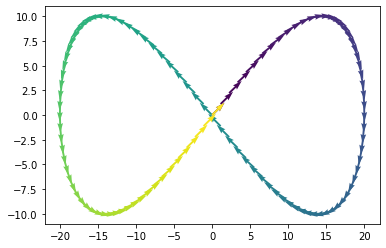

In [ ]:
x, y, heading = get8ShapeTrajectory(20, debug = True)

# Plot trajectory using two-dimensional (2D) plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.colors import Normalize

u = np.array([math.cos(h) for h in heading])
v = np.array([math.sin(h) for h in heading])

colors = np.linspace(0, 2 * math.pi, len(x))

norm = Normalize()
norm.autoscale(colors)

# Use quiver to show the heading
plt.quiver(x, y, u, v, color = cm.viridis(norm(colors)))
plt.show()

### Example 2: Generate an 8-shape trajectory with 15 radii and fixed height for a flying robot

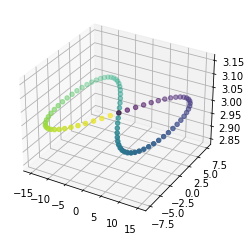

In [ ]:
x, y, z, heading = get8ShapeTrajectory(15, 
                                       using_flying_robot = True)

# Plot trajectory using three-dimensional (3D) plotting
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

color = np.linspace(0, 2 * math.pi, len(x))
ax.scatter3D(x, y, z, c = color)

### Example 3: Generate an 8-shape trajectory with ten radii and oscillating height for a flying robot

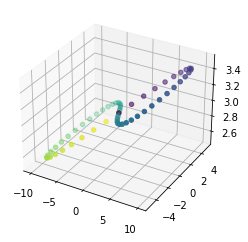

In [ ]:
x, y, z, heading = get8ShapeTrajectory(10, 
                                       using_flying_robot = True,
                                       use_fixed_height = False)

# Plot trajectory using three-dimensional (3D) plotting
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

color = np.linspace(0, 2 * math.pi, len(x))
ax.scatter3D(x, y, z, c = color)